In [1]:
%store -r data_dir
%store -r sheyenne_grasslands_gdf caddo_grasslands_gdf
%store -r sheyenne_soil_ph_da caddo_soil_ph_da
%store -r sheyenne_aspect_da caddo_aspect_da
%store -r sheyenne_45_annual_precip_da sheyenne_85_annual_precip_da
%store -r caddo_45_annual_precip_da caddo_85_annual_precip_da

In [2]:
# Import necessary packages
import os
import pathlib
from math import floor, ceil

from glob import glob
import pandas as pd # Aggregating and data manipulation
import matplotlib.pyplot as plt # Overlay pandas and xarray plots
import rioxarray as rxr # Work with raster data
import xarray as xr
from rioxarray.merge import merge_arrays # Merge rasters

In [3]:
def print_raster(raster):
    print(
        f"shape: {raster.rio.shape}\n"
        f"resolution: {raster.rio.resolution()}\n"
        f"bounds: {raster.rio.bounds()}\n"
        f"sum: {raster.sum().item()}\n"
        f"CRS: {raster.rio.crs}\n"
    )

## Harmonize data

### Reproject and match all Sheyenne DataArrays to the Sheyenne Soil DataArray

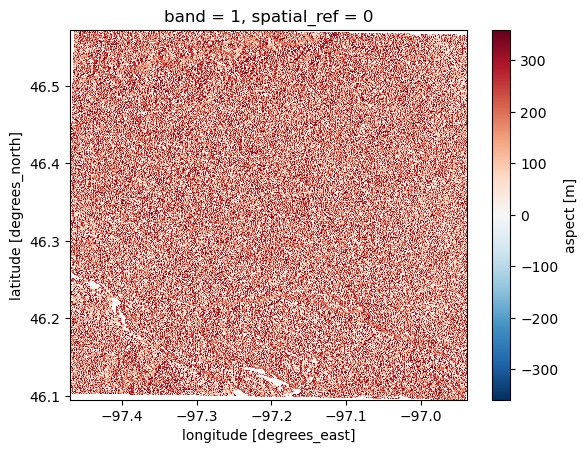

In [28]:
# Reproject and match sheyenne_aspect_da to the sheyenne_soil_ph_da
sheyenne_aspect_matched_da = sheyenne_aspect_da.rio.reproject_match(sheyenne_soil_ph_da)
sheyenne_aspect_matched_da.plot()

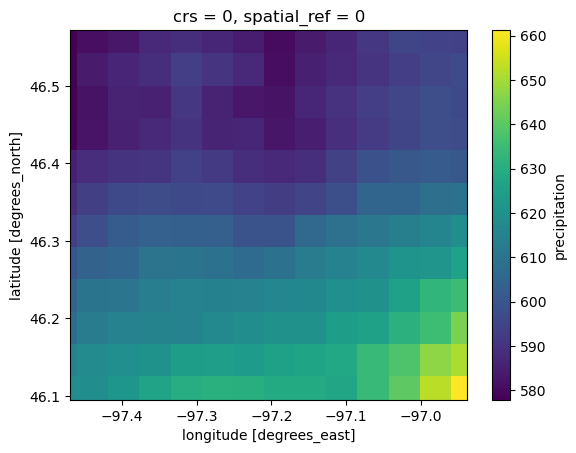

In [29]:
# Reproject and match sheyenne_45_annual_precip_da to the sheyenne_soil_ph_da
sheyenne_45_annual_precip_matched_da = sheyenne_45_annual_precip_da.rio.reproject_match(sheyenne_soil_ph_da)
sheyenne_45_annual_precip_matched_da.plot()

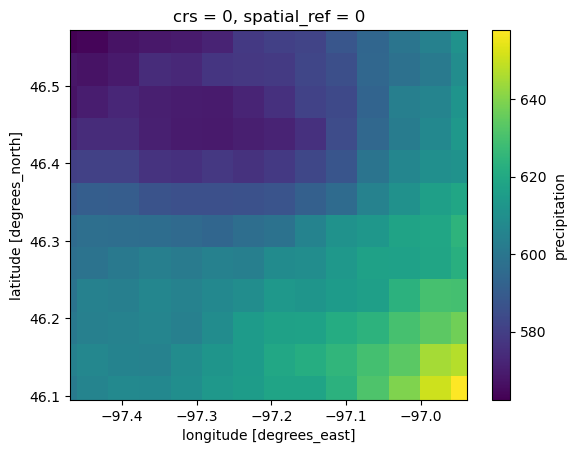

In [30]:
# Reproject and match sheyenne_85_annual_precip_da to the sheyenne_soil_ph_da
sheyenne_85_annual_precip_matched_da = sheyenne_85_annual_precip_da.rio.reproject_match(sheyenne_soil_ph_da)
sheyenne_85_annual_precip_matched_da.plot()

### Reproject and match all Caddo DataArrays to the Caddo Soil DataArray

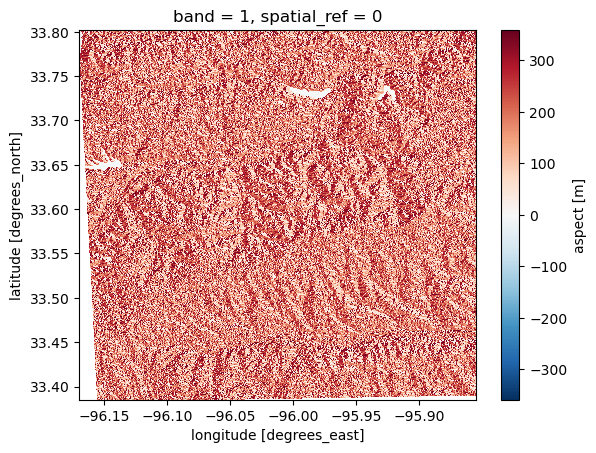

In [34]:
# Reproject and match caddo_aspect_da to the caddo_soil_ph_da
caddo_aspect_matched_da = caddo_aspect_da.rio.reproject_match(caddo_soil_ph_da)
caddo_aspect_matched_da.plot()

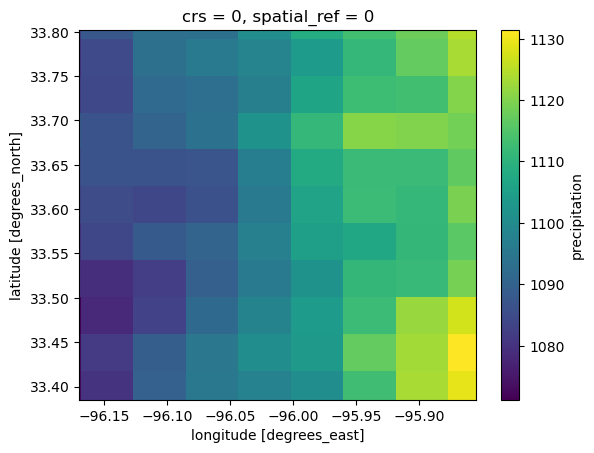

In [35]:
# Reproject and match caddo_45_annual_precip_da to the caddo_soil_ph_da
caddo_45_annual_precip_matched_da = caddo_45_annual_precip_da.rio.reproject_match(caddo_soil_ph_da)
caddo_45_annual_precip_matched_da.plot()

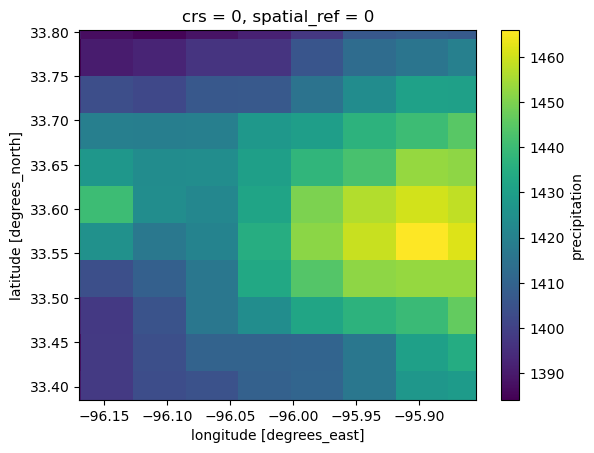

In [36]:
# Reproject and match caddo_85_annual_precip_da to the caddo_soil_ph_da
caddo_85_annual_precip_matched_da = caddo_85_annual_precip_da.rio.reproject_match(caddo_soil_ph_da)
caddo_85_annual_precip_matched_da.plot()

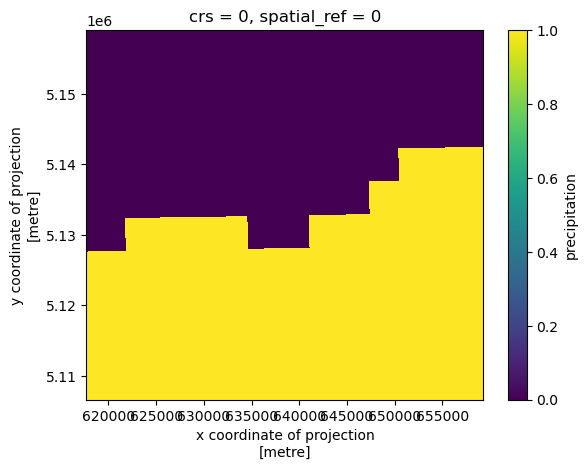

In [21]:
# Say, for ex, that the annual precip has to be greater than 600 mm
# We get an array of true and false values
# 1 is true (suitable), and 0 is false (not suitable)
sheyenne_45_annual_precip_suitable_da = sheyenne_45_annual_precip_matched_da > 600
sheyenne_45_annual_precip_suitable_da.plot()

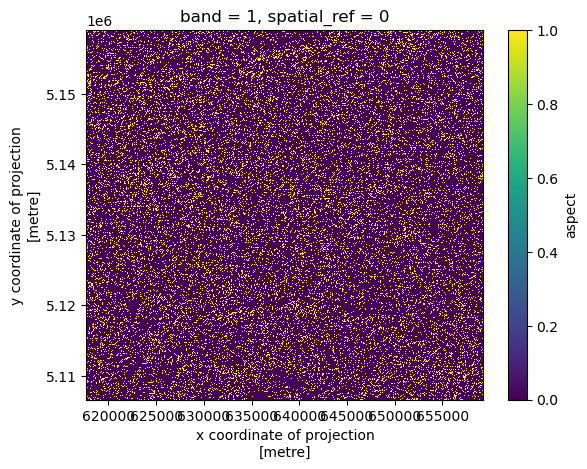

In [22]:
# Say aspect is suitable for any value bigger than 292.5
sheyenne_aspect_suitable_da = sheyenne_aspect_da > 292.5
sheyenne_aspect_suitable_da.plot()

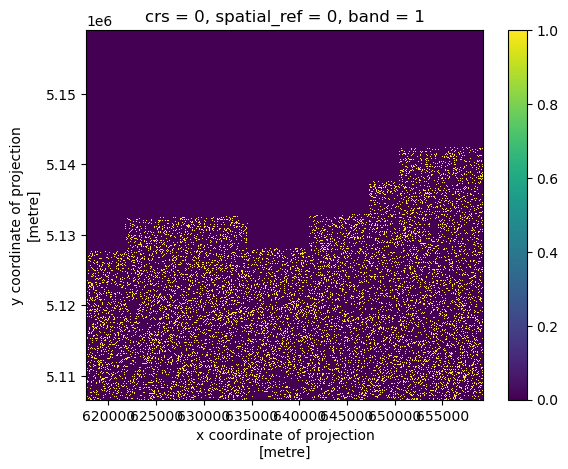

In [23]:
# raster multiplication to find where both aspect and precip are suitable, where both are 1
sheyenne_45_pr_aspect_suitable_da = sheyenne_45_annual_precip_suitable_da * sheyenne_aspect_suitable_da
sheyenne_45_pr_aspect_suitable_da.plot()